# Discrete Fourier Transform

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

print("Input Sine Wave Signal:")
N = 360 # degrees (Number of samples)
a = random.randint(1, 100)
f = random.randint(1, 50)
p = random.randint(0, 360)
print("frequency = {:3d}".format(f))
print("amplitude = {:3d}".format(a))
print("phase ang = {:3d}".format(p))

Input Sine Wave Signal:
frequency =  23
amplitude =  18
phase ang = 215


## Manually calculate the inverse Fourier transform

We can calculate the sine wave with $A\sin(ft + \phi)$. Because we are working in degrees, and Python's `sin()` function only understands radians, we need to convert using the `radians()` function.

In [2]:
from math import sin, pi, radians

f_list = []
for n in range(N):
    sample = a * sin(radians(f * n + p))
    f_list.append(sample)

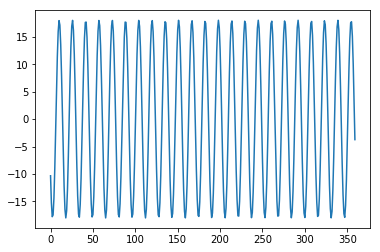

In [3]:
plt.plot(f_list);

We're going to implement the Fourier transform as given on Wolfram Alpha:
$$
F_n = \sum_{k=0}^{N-1} f_k e^{-2\pi ink/N}.
$$

In [4]:
from numpy import exp

#function to calculate the Discrete Fourier Transform
def DFT(f_list):
    N = len(f_list)
    DFT_list = []
    for n in range(N):
        Fn = 0.0
        for k in range(N):
            Fn += f_list[k] * exp(-2j * pi * n * k / N)
        DFT_list.append(Fn)
    return DFT_list        

In [5]:
DFT_list = DFT(f_list)

In [6]:
for n, coefficient in enumerate(DFT_list[:10]):
    print("F_{:<3d} = {}".format(n, coefficient))

F_0   = (-3.836930773104541e-13+0j)
F_1   = (-6.585842982076429e-13-2.0278223544778484e-13j)
F_2   = (3.0109248427834245e-13-1.5942802633617248e-13j)
F_3   = (7.962519532611623e-13-3.429756478823265e-13j)
F_4   = (5.906386491005833e-14+1.5115686480271506e-13j)
F_5   = (-9.814371537686384e-14+2.8371749394295875e-13j)
F_6   = (-5.595524044110789e-13+2.564060075371799e-13j)
F_7   = (-1.5170087408478139e-12+7.335798635210722e-13j)
F_8   = (4.2454928461665986e-13-1.0090817070818048e-12j)
F_9   = (1.91402449445377e-13-2.426947531830592e-13j)


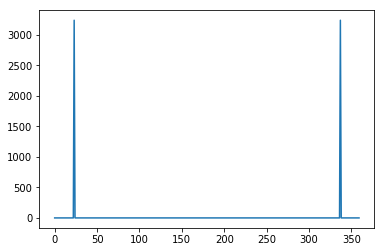

In [7]:
plt.plot(np.absolute(DFT_list));

We're going to implement the *inverse* Fourier transform as given on Wolfram Alpha:
$$
f_k = \frac{1}{N} \sum_{n=0}^{N-1} F_n e^{2\pi ikn/N}.
$$

In [8]:
#function to calculate the inverse Fourier transform
def inverse_DFT(DFT_list):
    N = len(DFT_list)
    f_list = []
    for k in range(N):
        fk = 0.0
        for n in range(N):
            fk += DFT_list[n] * exp(2j * pi * k * n / N)
        f_list.append(fk / N)
    return f_list        

In [9]:
f_list2 = inverse_DFT(DFT_list)

In [10]:
for n, (coefficient1, coefficient2) in enumerate(zip(f_list, f_list2[:10])):
    print("f_{:<3d} = {}\t{}".format(n, coefficient1, coefficient2))

f_0   = -10.32437585431883	(-10.32437585431802+2.4929252335276824e-13j)
f_1   = -15.264865730815664	(-15.264865730814256-5.589673635057342e-13j)
f_2   = -17.778390130712477	(-17.778390130712836-9.140066850779158e-13j)
f_3   = -17.465323072967937	(-17.465323072967852-9.042084048065572e-14j)
f_4   = -14.375439180851277	(-14.375439180851044-7.169445288089679e-13j)
f_5   = -9.000000000000007	(-9.000000000000197-1.669709802468986e-13j)
f_6   = -2.1936481812926503	(-2.193648181292698-2.3521383506743873e-13j)
f_7   = 4.961472404705988	(4.961472404705283-1.3970886585116268e-13j)
f_8   = 11.327767038897075	(11.327767038896468-2.3677417137569497e-13j)
f_9   = 15.893056671460684	(15.893056671460396+7.052679971466425e-13j)


Unfortunately, due to rounding errors, we're still seeing small imaginary values. They really are small. Let's calculate the largest absolute value of the imaginary parts:

In [11]:
np.max(np.abs(np.imag(f_list2)))

3.885354617436665e-12

So, indeed, rounding errors. Let's make `f_list2` real by ignoring the imaginary part:

In [12]:
f_list2 = [np.real(u) for u in f_list2]

In [13]:
for n, (coefficient1, coefficient2) in enumerate(zip(f_list, f_list2[:10])):
    print("f_{:<3d} = {}\t{}".format(n, coefficient1, coefficient2))

f_0   = -10.32437585431883	-10.32437585431802
f_1   = -15.264865730815664	-15.264865730814256
f_2   = -17.778390130712477	-17.778390130712836
f_3   = -17.465323072967937	-17.465323072967852
f_4   = -14.375439180851277	-14.375439180851044
f_5   = -9.000000000000007	-9.000000000000197
f_6   = -2.1936481812926503	-2.193648181292698
f_7   = 4.961472404705988	4.961472404705283
f_8   = 11.327767038897075	11.327767038896468
f_9   = 15.893056671460684	15.893056671460396


Let's see if the original and recreated values are the same:

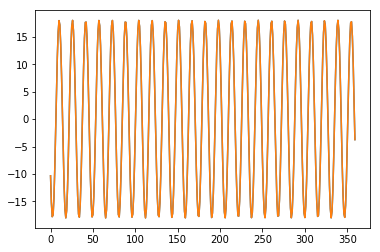

In [14]:
plt.plot(f_list)
plt.plot(f_list2);

They are! The plotted lines coincide.

## Again, but now with some NumPy magic

Calculating the original samples:

In [15]:
n = np.arange(N)
f_n = a * np.sin(np.radians(f * n + p))

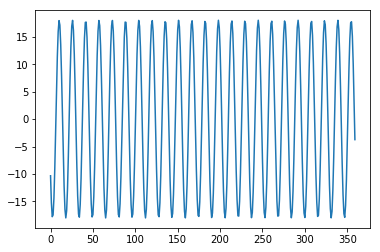

In [16]:
plt.plot(f_n);

Again, the Fourier transform as given on Wolfram Alpha:
$$
F_n = \sum_{k=0}^{N-1} f_k e^{-2\pi ink/N}.
$$
First, building values for $k$, and creating $f_k$, which is simply identical to $f_n$ (we only do this to be able to write down the python code as closely as possible to the mathematical formula):

In [17]:
k = np.arange(N)
f_k = f_n

Now, we calculate $F_n$. The entire calculation of the coefficients is done like this (explained below):

In [18]:
F_n = np.array([(f_k * exp(-2j * pi * n * k / N)).sum() for n in range(N)])

The inner part (`f_k * np.exp(... * k ...)`) uses NumPy magic. Because both `k` and `f_k` are NumPy arrays, they perform the calculation for all values of the array, without us requiring to build a loop. Multiplying the two arrays (using the `*` operator) simply performs element-wise multiplication, like this:

In [19]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(a)
print(b)
print(a * b)

[1 2 3]
[4 5 6]
[ 4 10 18]


The outer part (`[(...) for n in range(N)]`) is a list comprehension which loops over `n`, and creates a list, which we then turn into an array using `np.array()`. Then, we have an array of all $F_n$.

Unfortunately, we do have rounding errors in our calculations, leading to slightly different results between the two algorithms. The difference between the results can be significant, but only for very, very small values of the coefficients. We're only going to print the coefficients in the neighbourhood of our frequency `f`.

In [20]:
start, end = f - 10, f + 10
print('\tF_n\t\tDFT_list')
for n, (coefficient1, coefficient2) in enumerate(zip(F_n[start:end], DFT_list[start:end]), start):
    print("F_{:<3d} =\t{:.2e}\t{:.2e}".format(n, np.absolute(coefficient1), np.absolute(coefficient2)))

	F_n		DFT_list
F_13  =	4.78e-13	1.22e-12
F_14  =	1.52e-12	1.19e-12
F_15  =	3.05e-13	3.42e-13
F_16  =	5.13e-13	6.77e-13
F_17  =	2.32e-12	2.76e-12
F_18  =	1.57e-12	2.73e-12
F_19  =	5.50e-12	4.66e-12
F_20  =	1.17e-12	2.56e-12
F_21  =	1.33e-12	3.73e-12
F_22  =	1.06e-11	1.24e-11
F_23  =	3.24e+03	3.24e+03
F_24  =	6.34e-12	6.86e-12
F_25  =	1.20e-12	4.17e-12
F_26  =	1.74e-12	2.27e-12
F_27  =	4.28e-12	5.51e-12
F_28  =	3.17e-12	3.78e-12
F_29  =	2.76e-12	3.34e-12
F_30  =	3.16e-12	2.31e-12
F_31  =	1.33e-12	2.28e-12
F_32  =	1.76e-12	1.71e-12


We can plot the two results to visually inspect if they are (more or less) identical:

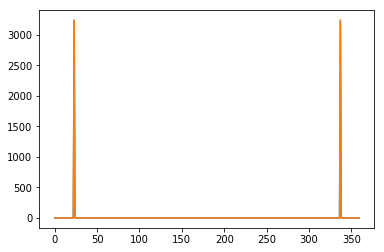

In [21]:
plt.plot(np.absolute(F_n))
plt.plot(np.absolute(DFT_list))

And again, the *inverse* Fourier transform as given on Wolfram Alpha:
$$
f_k = \frac{1}{N} \sum_{n=0}^{N-1} F_n e^{2\pi ikn/N}.
$$

In [22]:
n = np.arange(N)
f2_k = 1 / N * np.array([(F_n * exp(2j * pi * k * n / N)).sum() for k in range(N)])

In [23]:
for n, (coefficient1, coefficient2) in enumerate(zip(f_n, f2_k[:10])):
    print("f_{:<3d} = {}\t{}".format(n, coefficient1, coefficient2))
    
print("\nMaximum deviation from zero for the imaginary parts: {}j".format(np.max(np.abs(np.imag(f2_k)))))

f2_k = np.real(f2_k)

f_0   = -10.32437585431883	(-10.32437585431762+8.880205213144008e-13j)
f_1   = -15.264865730815664	(-15.264865730814652-4.616948798583406e-13j)
f_2   = -17.778390130712477	(-17.778390130712705-8.196505202957067e-13j)
f_3   = -17.465323072967937	(-17.465323072967326-1.1116046355002457e-13j)
f_4   = -14.375439180851277	(-14.375439180851039-5.684341886080801e-13j)
f_5   = -9.000000000000007	(-8.999999999999734-1.1254996934439987e-12j)
f_6   = -2.1936481812926503	(-2.193648181293877-9.24652946802477e-13j)
f_7   = 4.961472404705988	(4.9614724047047085+6.745419038149218e-13j)
f_8   = 11.327767038897075	(11.327767038896821+2.1221543041368326e-13j)
f_9   = 15.893056671460684	(15.893056671460203+8.286507282820013e-13j)

Maximum deviation from zero for the imaginary parts: 3.6370314167773662e-12j


Again, rounding errors result in small imaginary values.

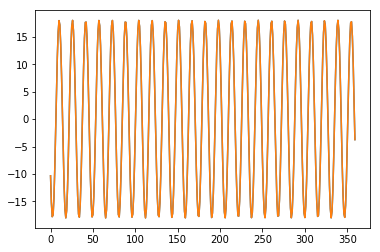

In [24]:
plt.plot(f_n)
plt.plot(f2_k);

## Why bother with NumPy?

Well, for two reasons, basically. Firstly, once you get the hang of it, writing the Fourier transform using NumPy was *much* shorter than writing the function. Secondly, the NumPy code runs *much* faster. Let's time and compare the two methods:

In [25]:
%timeit DFT(f_list)

226 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit np.array([(f_k * exp(-2j * pi * n * k / N)).sum() for n in range(N)])

6.61 ms ± 322 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


That's a speedup factor of about 20-30, depending on the exact signal.